In [111]:
from tqdm import tqdm
import albumentations as A
from albumentations import ToTensorV2
import cv2
import matplotlib.pyplot as plt
import os

In [11]:
def visualize(img_path):
  img = cv2.imread(img_path)

  plt.figure(figsize=(6, 5))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

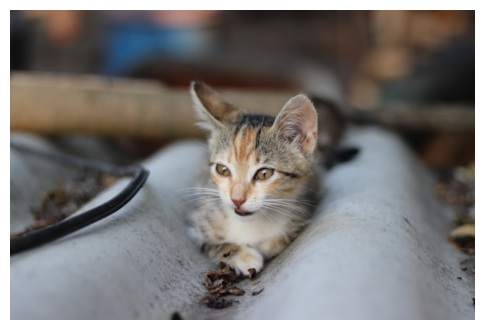

In [12]:
visualize('/content/drive/MyDrive/Computer_vision/Datasets/Random_datasets/bobby-iv-tcGURypIWcM-unsplash.jpg')

## Augmentation for single Image

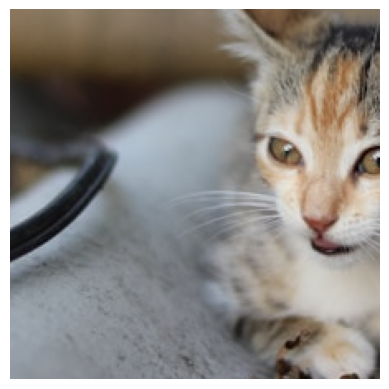

In [50]:
img = cv2.imread('/content/drive/MyDrive/Computer_vision/Datasets/Random_datasets/bobby-iv-tcGURypIWcM-unsplash.jpg')
augmentated = A.RandomCrop(224, 224)(image=img)

plt.imshow(cv2.cvtColor(augmentated['image'], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Augmentation with pipeline for single Image

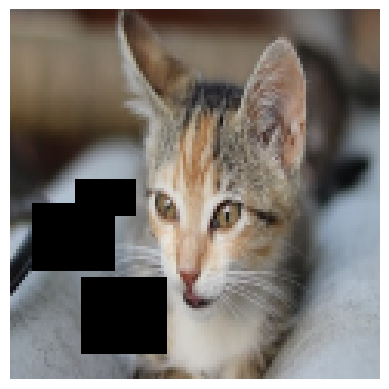

In [126]:
img = cv2.imread('/content/drive/MyDrive/Computer_vision/Datasets/Random_datasets/bobby-iv-tcGURypIWcM-unsplash.jpg')
augmentated = A.Compose([
    A.Resize(224, 224),
    # A.RandomCrop(224, 224),
    A.CenterCrop(height=120, width=120),
    A.HorizontalFlip(p=0.5),
    A.CoarseDropout(num_holes_range=(1, 8), hole_height_range=(0.1, 0.25),
                        hole_width_range=(0.1, 0.25), p=1.0),
    # A.GridDropout(ratio=0.5, unit_size_range=(2, 4), p=1.0),
    # A.Blur(blur_limit=(3, 7), p=1.0),
    # A.ChannelDropout(p=1.0),
    # A.Affine(
    #     scale=(.8, 1.2),
    #     rotate=(-5, 10),
    #     p=1.0
    # ),
    # A.ElasticTransform(p=1),
])(image=img)

plt.imshow(cv2.cvtColor(augmentated['image'], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Augmentation for multiple Image

In [150]:
def create_augmentations(target_size):
  TARGET_SIZE = target_size
  transforms = A.Compose([
      A.Resize(height=TARGET_SIZE, width=TARGET_SIZE, p=1.0),
      A.RandomCrop(height=TARGET_SIZE, width=TARGET_SIZE, p=1.0),
      A.HorizontalFlip(p=0.5),
      A.OneOf([
          A.CoarseDropout(num_holes_range=(1, 8), hole_height_range=(0.1, 0.25),
                        hole_width_range=(0.1, 0.25), p=1.0),
          A.GridDropout(ratio=0.5, unit_size_range=(2, 4), p=1.0),
      ]),
      A.ColorJitter(p=0.9),
      A.ZoomBlur(max_factor=(2, 4), p=0.5),
  ])

  return transforms

In [148]:
def perform_aug(dataset_path, output_path, random_sample=10):
  image_types = ['.jpg', '.png', '.jpeg']
  destination = os.path.join(dataset_path, output_path)

  if not os.path.exists(destination):
    os.makedirs(destination)

  image_files = [f for f in os.listdir(dataset_path) if any(ele in f for ele in image_types)]

  for image_file in tqdm(image_files):
    full_path = os.path.join(dataset_path, image_file)
    image = cv2.imread(full_path)

    transformer = create_augmentations(224)

    for i in range(random_sample):
      augmentated_image = transformer(image=image)['image']

      file_name = image_file.split('.')[0] + f'aug-{i}.jpg'
      out_path = os.path.join(destination, file_name)

      cv2.imwrite(out_path, augmentated_image)

  print(f'\n\nAugemented image saved at {destination}')

In [151]:
dataset_path = '/content/drive/MyDrive/Computer_vision/Datasets/Random_datasets'
output_path = 'augmentated'

perform_aug(dataset_path, output_path)

100%|██████████| 5/5 [00:01<00:00,  4.09it/s]



Augemented image saved at /content/drive/MyDrive/Computer_vision/Datasets/Random_datasets/augmentated
